In [89]:
%load_ext autoreload
%autoreload 2
# import warnings 
# warnings.filterwarnings("ignore")

import os
os.chdir(r'C:\Users\NILS\Documents\ATIAM\PAM\deep-eurorack-control\src')
import numpy as np
from tqdm import tqdm
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
raw_data_dir = r'C:\Users\NILS\Documents\ATIAM\PAM\Datasets\nsynth-train\audio'
dataset_dir = r'C:\Users\NILS\Documents\ATIAM\PAM\Datasets\strings_full'
filter = 'string_acoustic'
sr = 16000
frame_size = 256
nb_files = 300

In [53]:
metrics_names = ["Loudness","Centroid","Bandwidth","Flatness","Rolloff"]

In [88]:
metrics_arr = preprocess_dataset_metrics(raw_data_dir,dataset_dir,filter,metrics_names,sr,frame_size,nb_files=None)

100%|████████████████████████████████████████████████████████████████████████████| 10577/10577 [04:19<00:00, 40.74it/s]


In [90]:
for entry in metrics_arr:
    for name in metrics_names:
        entry[name] = np.mean(entry[name])

In [91]:
dataframe = pd.DataFrame(metrics_arr)
dataframe

,Loudness,Centroid,Bandwidth,Flatness,Rolloff
0,0.038928,685.538032,1295.017046,0.156945,1157.751465
1,0.038928,685.527595,1294.991521,0.156945,1157.751465
2,0.038928,685.527990,1294.993505,0.156945,1157.751465
3,0.038506,651.895429,1288.694203,0.132760,1016.589355
4,0.036658,655.455142,1286.327333,0.145236,1007.702637
...,...,...,...,...,...
10572,0.115314,3518.373443,2206.209428,0.001278,5434.399414
10573,0.115314,3518.384619,2206.226527,0.001278,5434.399414
10574,0.098497,3962.407539,2234.403759,0.002057,6241.125488
10575,0.086672,4167.780259,2225.718402,0.002224,6306.408691


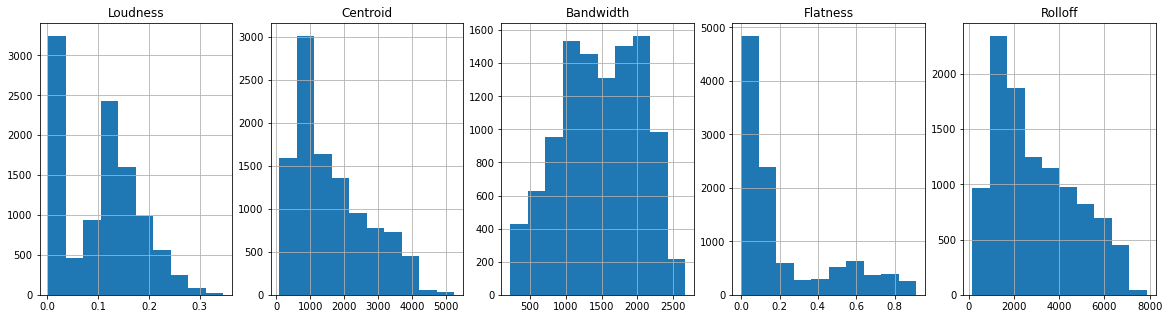

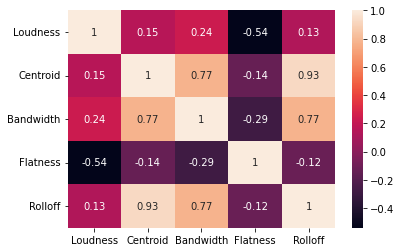

In [94]:
fig,axs = plt.subplots(1,len(metrics_names),figsize=(20,5))
for name,ax in zip(metrics_names,axs):
    dataframe[name].hist(ax=ax, bins=10)
    ax.set_title(name)
plt.show()
    
fig2 = plt.figure()
corrMatrix =dataframe.corr(method= "kendall")
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [48]:
def compute_metrics(curSignal,metrics_names):
    dataStruct = dict.fromkeys(metrics_names)
    dataStruct["Loudness"] = librosa.feature.rms(curSignal)
    # Compute the spectral centroid. [y, sr, S, n_fft, ...]
    dataStruct["Centroid"] = librosa.feature.spectral_centroid(curSignal)
    # Compute the spectral bandwidth. [y, sr, S, n_fft, ...]
    dataStruct["Bandwidth"] = librosa.feature.spectral_bandwidth(curSignal)
    # Compute spectral contrast [R16] , sr, S, n_fft, ...])	
    # dataStruct["Contrast"] = librosa.feature.spectral_contrast(curSignal)
    # Compute the spectral flatness. [y, sr, S, n_fft, ...]
    dataStruct["Flatness"] = librosa.feature.spectral_flatness(curSignal)
    # Compute roll-off frequency
    dataStruct["Rolloff"] = librosa.feature.spectral_rolloff(curSignal)
    return (dataStruct)

In [44]:
def preprocess_dataset_metrics(raw_data_dir,dataset_dir,filter,metrics_names,sr,frame_size,nb_files):
    files= os.listdir(raw_data_dir) 
    os.makedirs(dataset_dir,exist_ok=True)
    audio_files = []
    for file in files:
            if filter in file:
                audio_files.append(os.path.join(raw_data_dir,file))
                # break
    
        
    if nb_files is not None:
        audio_files=audio_files[:nb_files]
    
    
    metrics_arr = []
    for i,file in enumerate(tqdm(audio_files)): 
        signal,_ = librosa.load(file,sr)
        metrics_arr.append(compute_metrics(signal,metrics_names))
    return metrics_arr
#     nb_samples = len(audio_files)
#     nb_trames = int(len(librosa.load(audio_files[0],sr)[0])/frame_size)
#     loudness_arr = np.zeros((nb_samples,nb_trames,1))
#     pitch_arr = np.zeros((nb_samples,nb_trames,1))
#     audio_arr = np.zeros((nb_samples,nb_trames,frame_size))
    
    
#     for i,file in enumerate(tqdm(audio_files)):
#             signal,_ = librosa.load(file,sr)
#             pitch_arr[i] = get_pitch(signal,sr,frame_size).reshape(-1,1)
#             loudness_arr[i] = get_loudness(signal,sr,frame_size,n_fft=1024).reshape(-1,1)
#             audio_arr[i] = signal.reshape(-1,frame_size)
            
        
        
#     l_mean,l_std = np.mean(loudness_arr),np.std(loudness_arr)
#     loudness_arr = (loudness_arr-l_mean)/l_std
            
#     save_pickle(pitch_arr,os.path.join(dataset_dir,'pitch.pkl'))
#     save_pickle(loudness_arr,os.path.join(dataset_dir,'loudness.pkl'))
#     save_pickle(audio_arr,os.path.join(dataset_dir,'audio.pkl'))